#Importing Libraries

In [ ]:
#!pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder , StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import joblib
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
#from mlxtend.plotting import plot_confusion_matrix
#from sklearn.metrics import confusion_matrix

#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive'

 22cs8147_server.c
'Algorithm Lab'
'AP Resume Offline (1).pdf'
'AP Resume Offline.pdf'
'Arin Photo.jpg'
'ASSIGNMENT - 5.gdoc'
 best_uci_cnn_model.keras
'best_uci_cnn_model(my_dataset).keras'
'chat server designing.gdoc'
 Classroom
'Colab Notebooks'
'Compiler Lab'
'Computer Networks'
'Computer Networks Lab'
'CV College(Updated) - Arin Pramanick.pages'
'CV College(Updated) - Arin Pramanick.pdf'
'DBMS Lab'
'Department Bonafide (IIT intern).pdf'
'Football Tournament'
 HAR_train.csv
'HAR_train(Kalman).csv'
 LOR_Department.pdf
 MOVIE
'MR_ ARIN PRAMANICK.png'
 PAMAP2_Dataset
 pamp2_cnn.keras
 pampa_dataset_kalman.csv
'Result 4th sem'
'Statistical Analysis of Errors(Deepseek).gdoc'
 uci_cnn_model2.keras
 uci_cnn_model.keras
'uci_cnn_model(my_dataset).keras'
'UCI HAR'
'UCI-HAR Data Interpretation.gdoc'
'WISDM - Dataset Data Interpretation.gdoc'
 wisdm_hyperparam.keras
 WISDM_UCI_raw


In [ ]:
#loading the normalized dataset from previous work
file_path = "/content/drive/MyDrive/HAR_train(Kalman).csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Label,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z
0,2,0.096106,0.147865,0.382806,0.240874,0.247127,0.253681
1,2,0.129136,0.198625,0.510697,0.325103,0.338851,0.342578
2,2,0.145498,0.228106,0.573719,0.368250,0.376968,0.387123
3,2,0.154207,0.246893,0.611950,0.395370,0.399746,0.412309
4,2,0.159341,0.261084,0.640080,0.417946,0.425378,0.427751


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165768 entries, 0 to 165767
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Label   165768 non-null  int64  
 1   Acc_X   165768 non-null  float64
 2   Acc_Y   165768 non-null  float64
 3   Acc_Z   165768 non-null  float64
 4   Gyro_X  165768 non-null  float64
 5   Gyro_Y  165768 non-null  float64
 6   Gyro_Z  165768 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 8.9 MB


In [ ]:
# Check class distribution
print("Class distribution:\n", df['Label'].value_counts())

Class distribution:
 Label
1    58037
4    52601
3    42332
2     6000
6     5115
5     1683
Name: count, dtype: int64


#Visualisaion of the dataset

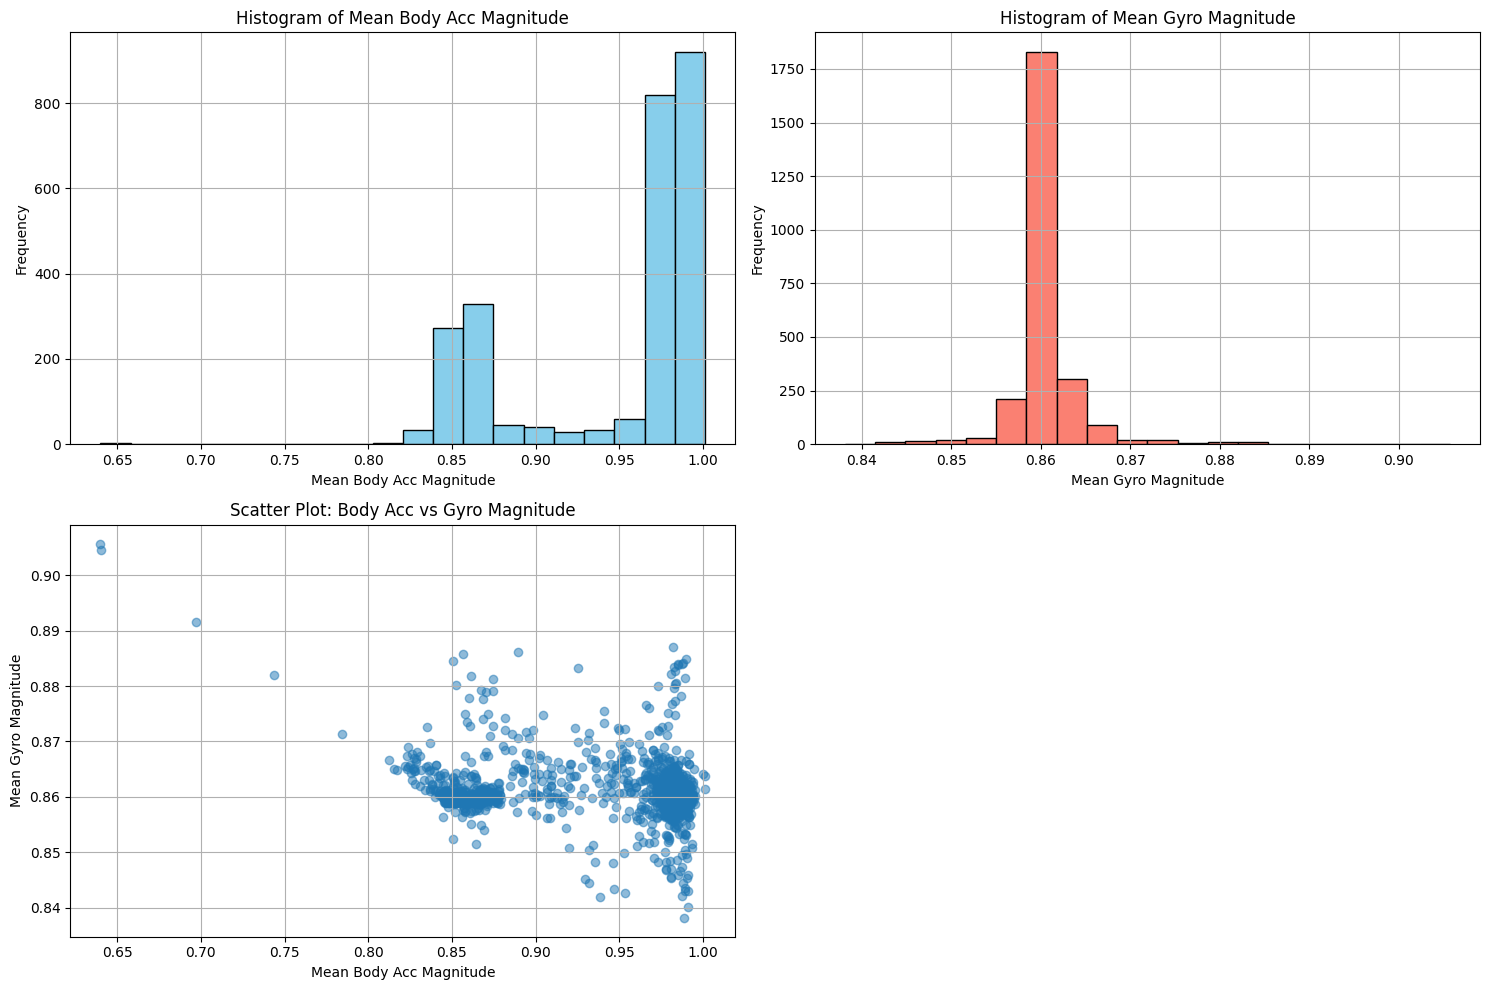

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("HAR_train(Kalman).csv")

# Parameters for windowing
window_size = 128
step_size = 64

# Extract accelerometer and gyroscope data
acc = df[['Acc_X', 'Acc_Y', 'Acc_Z']].values
gyro = df[['Gyro_X', 'Gyro_Y', 'Gyro_Z']].values

# Lists to store mean magnitudes
mean_body_acc = []
mean_gyro = []

# Create windows and compute mean magnitudes
num_windows = (len(df) - window_size) // step_size + 1
for i in range(num_windows):
    start = i * step_size
    end = start + window_size

    acc_window = acc[start:end]
    gyro_window = gyro[start:end]

    # Compute magnitude for each window
    body_acc_magnitude = np.mean(np.linalg.norm(acc_window, axis=1))
    gyro_magnitude = np.mean(np.linalg.norm(gyro_window, axis=1))

    mean_body_acc.append(body_acc_magnitude)
    mean_gyro.append(gyro_magnitude)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Histogram for Mean Body Acc Magnitude
axes[0, 0].hist(mean_body_acc, bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Mean Body Acc Magnitude')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Mean Body Acc Magnitude')
axes[0, 0].grid(True)

# Histogram for Mean Gyro Magnitude
axes[0, 1].hist(mean_gyro, bins=20, color='salmon', edgecolor='black')
axes[0, 1].set_xlabel('Mean Gyro Magnitude')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Mean Gyro Magnitude')
axes[0, 1].grid(True)

# Scatter plot between Body Acc and Gyro Magnitudes
axes[1, 0].scatter(mean_body_acc, mean_gyro, alpha=0.5)
axes[1, 0].set_xlabel('Mean Body Acc Magnitude')
axes[1, 0].set_ylabel('Mean Gyro Magnitude')
axes[1, 0].set_title('Scatter Plot: Body Acc vs Gyro Magnitude')
axes[1, 0].grid(True)

# Hide unused subplot
axes[1, 1].axis('off')

# Adjust layout and show
plt.tight_layout()
plt.show()


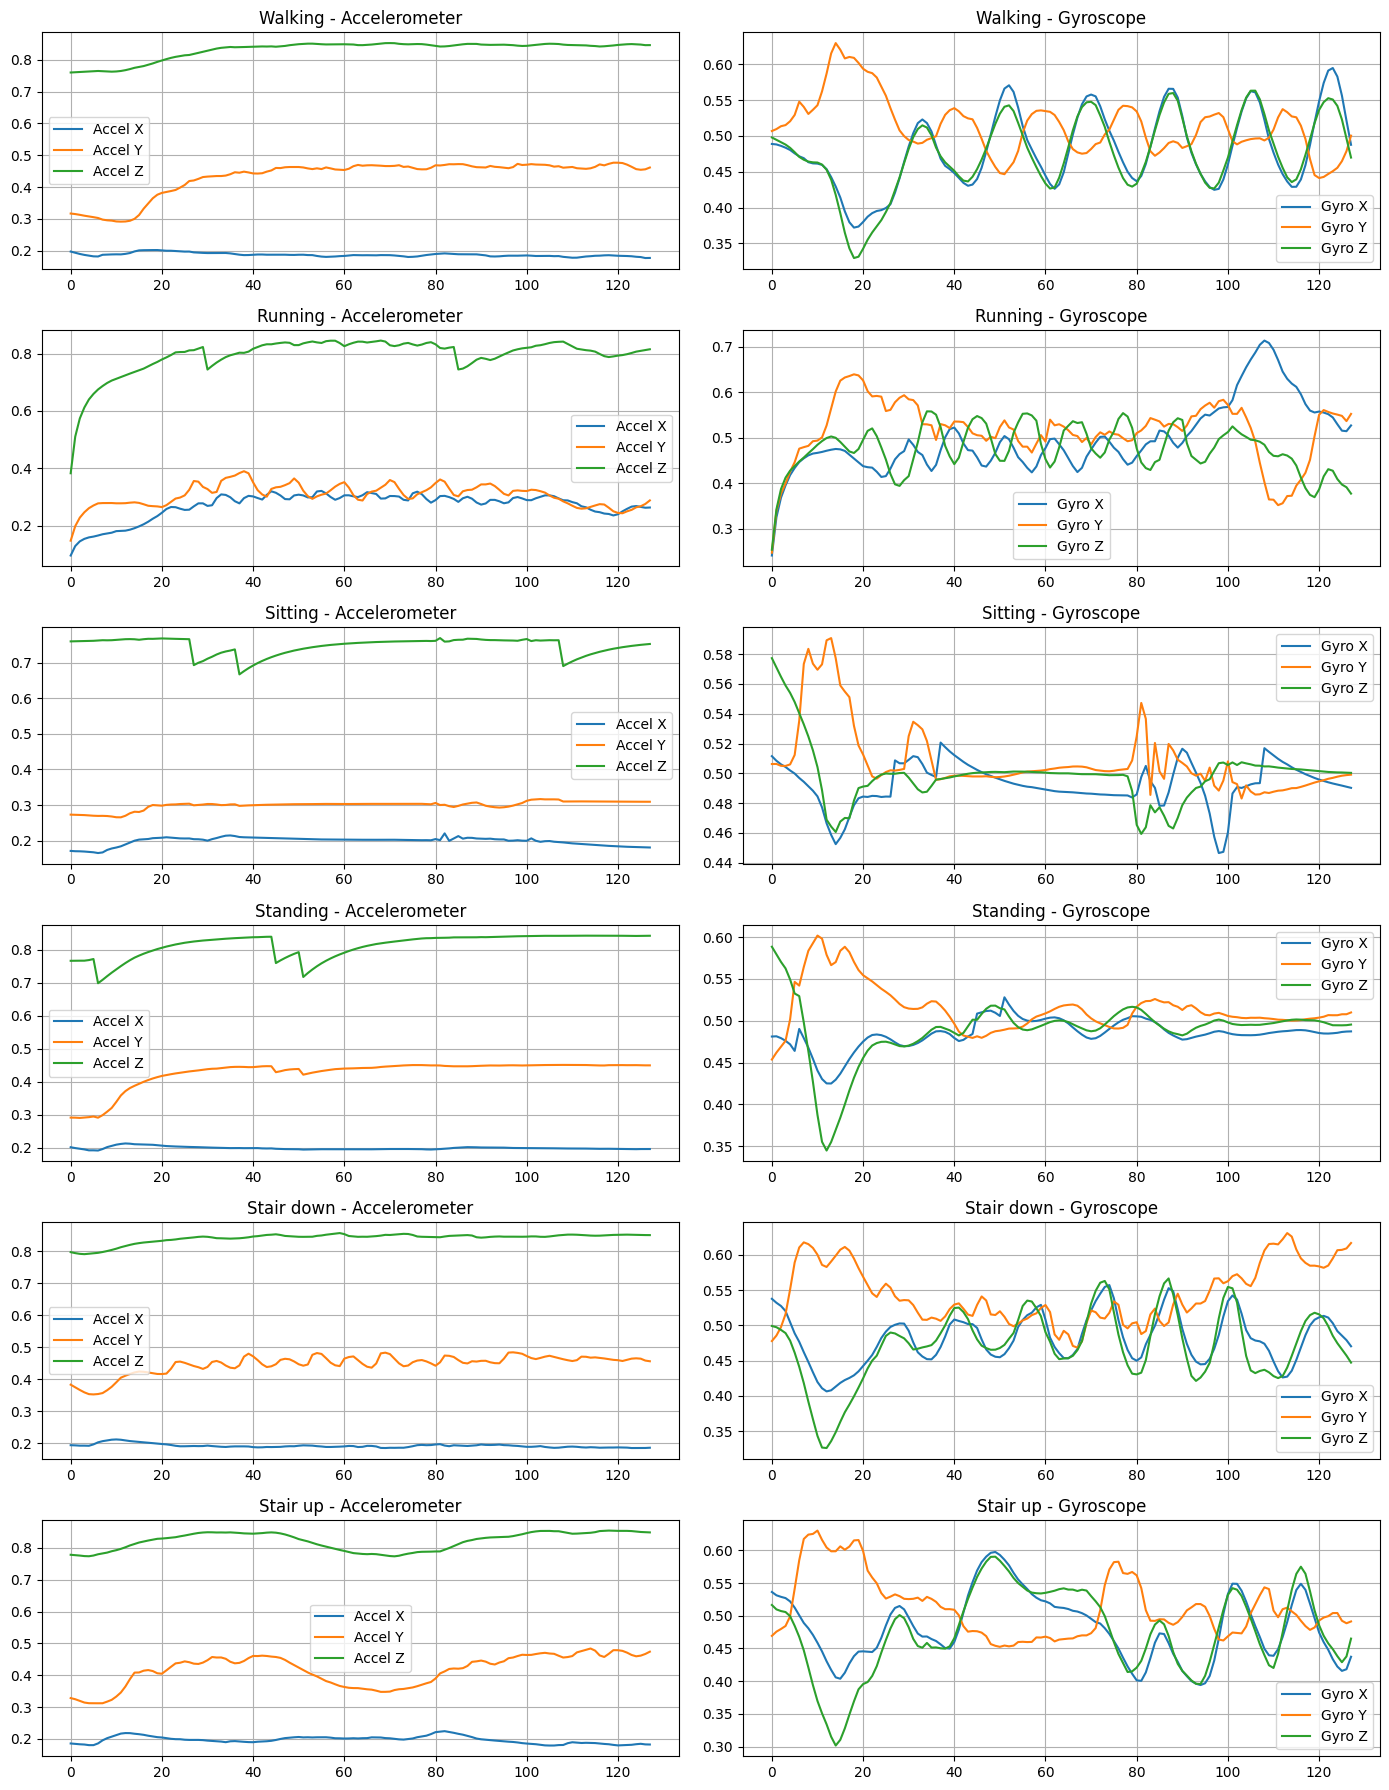

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("HAR_train(Kalman).csv")

# Activity label mapping (1-indexed as per your dataset)
activity = {
    1: 'Walking',
    2: 'Running',
    3: 'Sitting',
    4: 'Standing',
    5: 'Stair down',
    6: 'Stair up'
}

# List of activity labels
selected_activities = list(activity.keys())

# Window size for each sample
window_size = 128

# Create subplots: one row per activity, 2 columns (accel, gyro)
fig, axes = plt.subplots(len(selected_activities), 2, figsize=(14, 3 * len(selected_activities)))

# Loop over each activity
for i, act in enumerate(selected_activities):
    # Filter data for the current activity
    act_data = df[df["Label"] == act]

    # Skip if not enough samples for one window
    if len(act_data) < window_size:
        continue

    # Select the first 128-sample window
    sample = act_data.iloc[:window_size]

    # Extract Accelerometer and Gyroscope data
    acc = sample[['Acc_X', 'Acc_Y', 'Acc_Z']].values
    gyro = sample[['Gyro_X', 'Gyro_Y', 'Gyro_Z']].values

    # Plot Accelerometer data
    axes[i, 0].plot(acc[:, 0], label='Accel X')
    axes[i, 0].plot(acc[:, 1], label='Accel Y')
    axes[i, 0].plot(acc[:, 2], label='Accel Z')
    axes[i, 0].set_title(f'{activity[act]} - Accelerometer')
    axes[i, 0].legend()
    axes[i, 0].grid(True)

    # Plot Gyroscope data
    axes[i, 1].plot(gyro[:, 0], label='Gyro X')
    axes[i, 1].plot(gyro[:, 1], label='Gyro Y')
    axes[i, 1].plot(gyro[:, 2], label='Gyro Z')
    axes[i, 1].set_title(f'{activity[act]} - Gyroscope')
    axes[i, 1].legend()
    axes[i, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


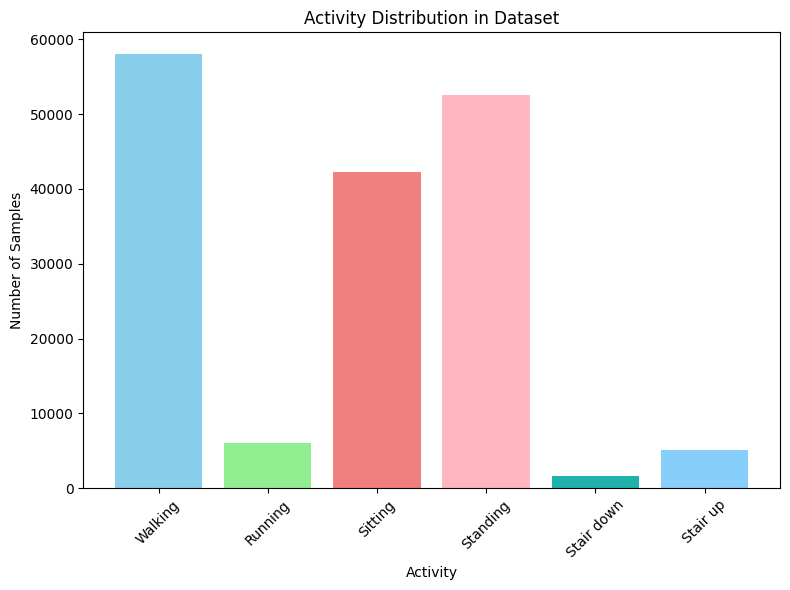

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
# df = pd.read_csv("HAR_train(Kalman).csv")

# Activity mapping (label: name)
activity = {
    1: 'Walking',
    2: 'Running',
    3: 'Sitting',
    4: 'Standing',
    5: 'Stair down',
    6: 'Stair up'
}

# Count number of samples for each activity
activity_counts = df['Label'].value_counts().sort_index()

# Map numeric labels to activity names
activity_names = [activity[i] for i in activity_counts.index]

# Define colors
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightseagreen', 'lightskyblue']

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(activity_names, activity_counts.values, color=colors)
plt.xlabel('Activity')
plt.ylabel('Number of Samples')
plt.title('Activity Distribution in Dataset')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


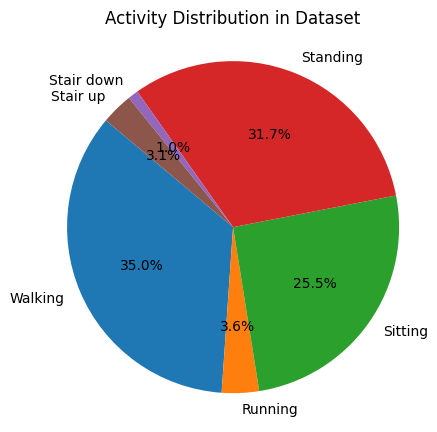

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
# df = pd.read_csv("HAR_train(Kalman).csv")

# Activity label mapping
activity = {
    1: 'Walking',
    2: 'Running',
    3: 'Sitting',
    4: 'Standing',
    5: 'Stair down',
    6: 'Stair up'
}

# Count occurrences of each activity label
activity_counts = df['Label'].value_counts().sort_index()

# Get activity names
activity_names = [activity[i] for i in activity_counts.index]

# Use a distinguishable colormap
cmap = plt.get_cmap('tab10')  # Alternatives: 'Set3', 'Paired'
colors = [cmap(i) for i in range(len(activity_counts))]

# Plot pie chart
plt.figure(figsize=(4.5, 4.5))
plt.pie(activity_counts, labels=activity_names, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Activity Distribution in Dataset')
plt.axis('equal')  # Ensures the pie chart is circular

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


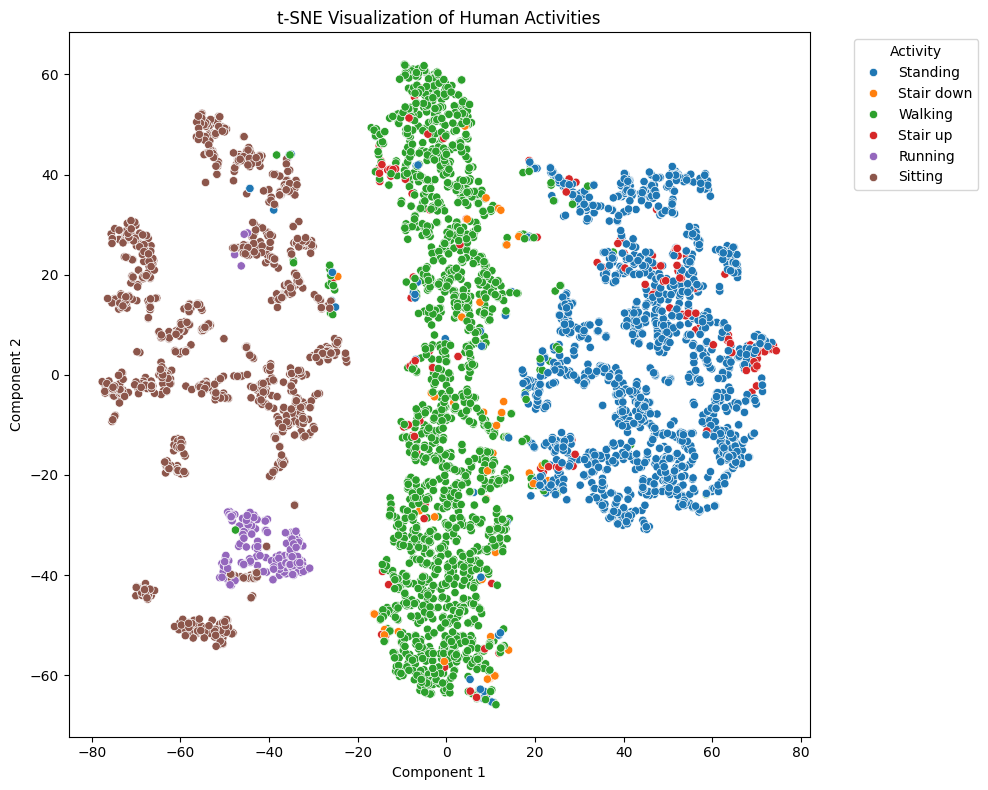

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# df = pd.read_csv("HAR_train(Kalman).csv")

# Activity mapping from label to name
activity = {
    1: 'Walking',
    2: 'Running',
    3: 'Sitting',
    4: 'Standing',
    5: 'Stair down',
    6: 'Stair up'
}

# Separate features and labels
X = df.drop('Label', axis=1).values
y = df['Label'].values

# Sample 5000 points with stratification for balanced classes
X_sampled, y_sampled = resample(X, y, n_samples=5000, stratify=y, random_state=42)

# Map numeric labels to activity names
activity_labels = [activity[label] for label in y_sampled]

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_embedded = tsne.fit_transform(X_sampled)

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1],
                hue=activity_labels, palette='tab10', legend='full')
plt.title("t-SNE Visualization of Human Activities")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Activity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


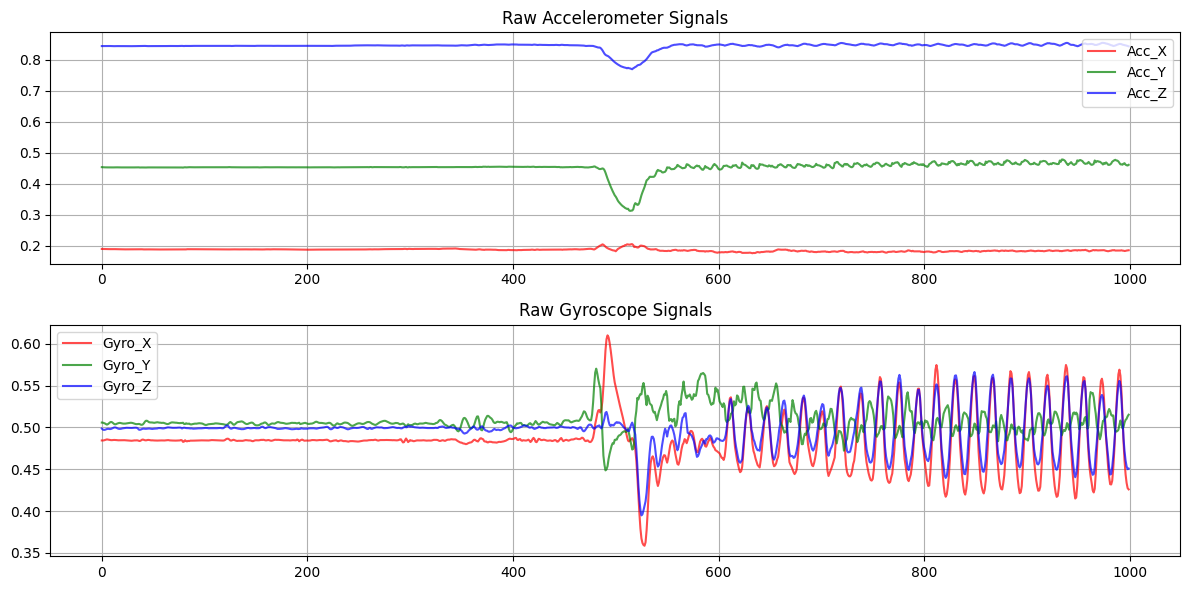

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_raw_signals(df, sample_size=1000):
    """
    Plots raw accelerometer and gyroscope signals from the HAR Kalman dataset.

    Args:
        df (DataFrame): The HAR dataset with 'Acc_' and 'Gyro_' columns.
        sample_size (int): Number of rows to visualize.
    """
    # Ensure sample size doesn't exceed dataset
    if len(df) < sample_size:
        raise ValueError("Sample size is larger than the dataset length.")

    # Choose a safe starting index
    start_idx = np.random.randint(0, len(df) - sample_size)
    sample_df = df.iloc[start_idx : start_idx + sample_size].reset_index(drop=True)

    # Create plots
    fig, axes = plt.subplots(2, 1, figsize=(12, 6))

    # Plot Accelerometer signals
    axes[0].plot(sample_df['Acc_X'], label='Acc_X', color='r', alpha=0.7)
    axes[0].plot(sample_df['Acc_Y'], label='Acc_Y', color='g', alpha=0.7)
    axes[0].plot(sample_df['Acc_Z'], label='Acc_Z', color='b', alpha=0.7)
    axes[0].set_title("Raw Accelerometer Signals")
    axes[0].legend()
    axes[0].grid(True)

    # Plot Gyroscope signals
    axes[1].plot(sample_df['Gyro_X'], label='Gyro_X', color='r', alpha=0.7)
    axes[1].plot(sample_df['Gyro_Y'], label='Gyro_Y', color='g', alpha=0.7)
    axes[1].plot(sample_df['Gyro_Z'], label='Gyro_Z', color='b', alpha=0.7)
    axes[1].set_title("Raw Gyroscope Signals")
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Run the function on your dataset
plot_raw_signals(df)


#Sliding Windows Creation

In [ ]:
FS = 10
WINDOW_SIZE = FS*2  #20 sec data
STRIDE = FS * 2  #overlap
sensor_cols = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']

In [ ]:
# data = data.drop(['timestamp' , 'duration'] , axis = 1).copy()
# data.head()

In [ ]:
# # Normalize the data using StandardScaler
# scaler = StandardScaler()
# data[sensor_cols] = scaler.fit_transform(data[sensor_cols])
# data.head()

In [ ]:
# # Save the scaler for testing consistency
# joblib.dump(scaler, 'scaler.pkl')

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

# Sensor columns used for windowing
sensor_cols = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']

# Optimized sliding window function
def create_sliding_windows(data, window_size, stride, sensor_cols):
    X, y = [], []
    data_array = data[sensor_cols].values
    labels_array = data['Label'].values

    for i in range(0, len(data) - window_size, stride):
        X.append(data_array[i:i + window_size])
        y.append(labels_array[i + window_size - 1])

    return np.array(X, dtype=np.float32), np.array(y)

# Parameters
WINDOW_SIZE = 30
STRIDE = 20

# Create windows from a smaller slice to avoid memory issues
X, y = create_sliding_windows(df, WINDOW_SIZE, STRIDE, sensor_cols)

# Preview two sample windows
for i in range(2):
    segment = pd.DataFrame(X[i], columns=sensor_cols)

    # Top 2 and bottom 2 rows
    top = segment.iloc[:2]
    bottom = segment.iloc[-2:]

    # Ellipsis rows
    dots = pd.DataFrame([["..."] * len(sensor_cols)] * 2, columns=sensor_cols)

    # Combine parts
    preview = pd.concat([top, dots, bottom], ignore_index=True)

    # Set meaningful display index
    preview.index = [1, 2, "...", "...", WINDOW_SIZE - 1, WINDOW_SIZE]

    # Display
    print(f"\n Sliding Window {i+1} (rows {i*STRIDE+1} to {i*STRIDE + WINDOW_SIZE}), Label: {y[i]}")
    display(preview)



🪟 Sliding Window 1 (rows 1 to 30), Label: 2


,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z
1,0.096106,0.147865,0.382806,0.240874,0.247127,0.253681
2,0.129136,0.198625,0.510697,0.325103,0.338851,0.342578
...,...,...,...,...,...,...
...,...,...,...,...,...,...
29,0.277924,0.35358,0.817422,0.464161,0.58819,0.394197
30,0.277938,0.335299,0.822774,0.470739,0.593766,0.406784



🪟 Sliding Window 2 (rows 21 to 50), Label: 2


,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z
1,0.24522,0.264931,0.77934,0.437627,0.62651,0.495583
2,0.258362,0.271692,0.786675,0.435328,0.602732,0.515265
...,...,...,...,...,...,...
...,...,...,...,...,...,...
29,0.292024,0.348444,0.837479,0.449601,0.502427,0.49943
30,0.305567,0.364769,0.82938,0.466967,0.499242,0.464323


In [ ]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Encode windowed labels
y_categorical = to_categorical(y_encoded)  # Convert to one-hot

In [ ]:
encoder.classes_

array([1, 2, 3, 4, 5, 6])

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (8287, 30, 6)
y shape: (8287,)


In [ ]:
# Reshape for CNN input (samples, window_size, features, channels)
X = X.reshape(-1, WINDOW_SIZE, len(sensor_cols), 1)

In [ ]:
X.shape

(8287, 30, 6, 1)

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(6629, 30, 6, 1)

In [ ]:
print("X_test shape:",X_test.shape)
print("Y_test shape:",y_test.shape)
print("Y_train shape:",y_train.shape)

X_test shape: (1658, 30, 6, 1)
Y_test shape: (1658, 6)
Y_train shape: (6629, 6)


In [ ]:
# Compute class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = dict(enumerate(class_weights))

In [ ]:
# # Data augmentation functions
# def jitter(x, sigma=0.03):
#     return x + np.random.normal(0, sigma, x.shape)

# def scaling(x, sigma=0.1):
#     factor = np.random.normal(1, sigma)
#     return x * factor

# def time_warp(x, stretch_factor=0.2):
#     len_x = x.shape[0]
#     stretch = np.random.uniform(1 - stretch_factor, 1 + stretch_factor)
#     indices = np.round(np.arange(0, len_x, stretch)).astype(int)
#     indices = np.clip(indices, 0, len_x - 1)
#     warped = x[indices]
#     if len(warped) < len_x:
#         pad_size = len_x - len(warped)
#         warped = np.pad(warped, ((0, pad_size), (0, 0), (0, 0)), mode='edge')
#     elif len(warped) > len_x:
#         warped = warped[:len_x]
#     return warped

# def augment_data(X):
#     augmented = []
#     for sample in X:
#         augmented.append(jitter(sample))
#         augmented.append(scaling(sample))
#         augmented.append(time_warp(sample))
#     return np.array(augmented)

In [ ]:
# # Apply augmentation to training data
# X_aug = augment_data(X_train)
# X_train_final = np.concatenate((X_train, X_aug), axis=0)
# y_train_final = np.concatenate((y_train, np.tile(y_train, (3, 1))), axis=0)

In [ ]:
X.shape

(8287, 30, 6, 1)

In [ ]:
num_classes = 6

#CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.regularizers import l2

# Build the model
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(30, 6, 1),
                 padding='same',
                 kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu',
                 padding='same',
                 kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu',
                 padding='same',
                 kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Dense Block
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # 6 output classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 6, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 6, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 3, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 15, 3, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 3, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 15, 3, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 1, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,158 (817.02 KB)

 Trainable params: 208,710 (815.27 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Optional: early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.4975 - loss: 1.8501 - val_accuracy: 0.2624 - val_loss: 2.0455
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6301 - loss: 1.0890 - val_accuracy: 0.2624 - val_loss: 3.2114
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8054 - loss: 0.8653 - val_accuracy: 0.2783 - val_loss: 4.9949
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8825 - loss: 0.6942 - val_accuracy: 0.2391 - val_loss: 5.6778
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9044 - loss: 0.6308 - val_accuracy: 0.6395 - val_loss: 2.1771
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9043 - loss: 0.5875 - val_accuracy: 0.6433 - val_loss: 1.9010
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9200 - loss: 0.5348 - val_accuracy: 0.6501 - val_loss: 2.0076
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9192 - loss: 0.4996 - val_accuracy: 0.6463 - 

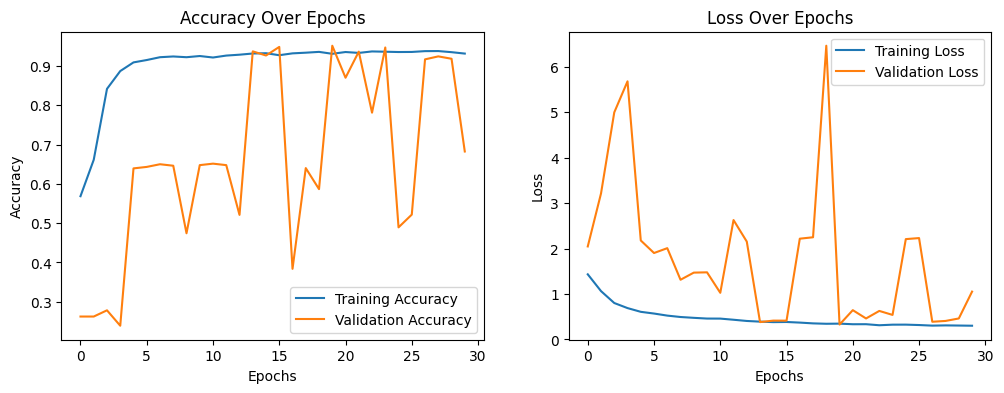

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()

In [ ]:
#Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}'),
print(f'Test Accuracy: {accuracy:.4f}')

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9510 - loss: 0.2979
Test Loss: 0.2995
Test Accuracy: 0.9493


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


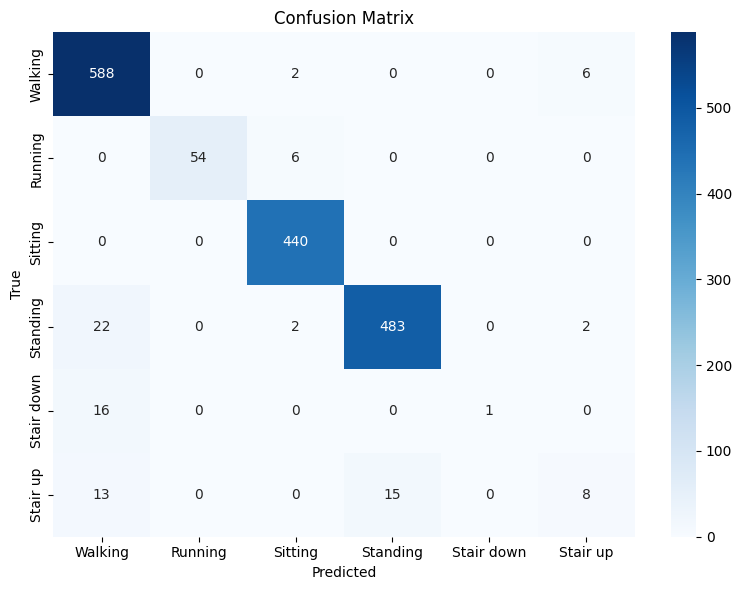


Classification Report:

              precision    recall  f1-score   support

     Walking       0.92      0.99      0.95       596
     Running       1.00      0.90      0.95        60
     Sitting       0.98      1.00      0.99       440
    Standing       0.97      0.95      0.96       509
  Stair down       1.00      0.06      0.11        17
    Stair up       0.50      0.22      0.31        36

    accuracy                           0.95      1658
   macro avg       0.89      0.69      0.71      1658
weighted avg       0.95      0.95      0.94      1658



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Predict class probabilities
y_pred_prob = model.predict(X_test)

# 2. Convert probabilities to class indices
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)  # assuming y_test is also one-hot encoded

# 3. Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Activity label mapping (for display)
activity = {
    0: 'Walking',
    1: 'Running',
    2: 'Sitting',
    3: 'Standing',
    4: 'Stair down',
    5: 'Stair up'
}
labels = [activity[i] for i in range(6)]

# 5. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))


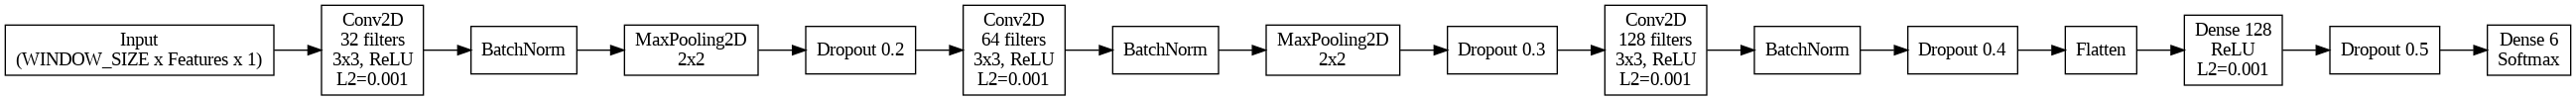

In [ ]:
from graphviz import Digraph
from IPython.display import Image

def draw_cnn_architecture():
    dot = Digraph(format='png', graph_attr={'rankdir': 'LR'})

    # Input
    dot.node('Input', 'Input\n(WINDOW_SIZE x Features x 1)', shape='box')

    # Conv Block 1
    dot.node('Conv1', 'Conv2D\n32 filters\n3x3, ReLU\nL2=0.001', shape='box')
    dot.node('BN1', 'BatchNorm', shape='box')
    dot.node('Pool1', 'MaxPooling2D\n2x2', shape='box')
    dot.node('Drop1', 'Dropout 0.2', shape='box')

    # Conv Block 2
    dot.node('Conv2', 'Conv2D\n64 filters\n3x3, ReLU\nL2=0.001', shape='box')
    dot.node('BN2', 'BatchNorm', shape='box')
    dot.node('Pool2', 'MaxPooling2D\n2x2', shape='box')
    dot.node('Drop2', 'Dropout 0.3', shape='box')

    # Conv Block 3
    dot.node('Conv3', 'Conv2D\n128 filters\n3x3, ReLU\nL2=0.001', shape='box')
    dot.node('BN3', 'BatchNorm', shape='box')
    dot.node('Drop3', 'Dropout 0.4', shape='box')

    # Dense Block
    dot.node('Flatten', 'Flatten', shape='box')
    dot.node('Dense1', 'Dense 128\nReLU\nL2=0.001', shape='box')
    dot.node('Drop4', 'Dropout 0.5', shape='box')
    dot.node('Output', f'Dense {y_train.shape[1]}\nSoftmax', shape='box')

    # Connect layers
    dot.edges([
        ('Input', 'Conv1'), ('Conv1', 'BN1'), ('BN1', 'Pool1'), ('Pool1', 'Drop1'),
        ('Drop1', 'Conv2'), ('Conv2', 'BN2'), ('BN2', 'Pool2'), ('Pool2', 'Drop2'),
        ('Drop2', 'Conv3'), ('Conv3', 'BN3'), ('BN3', 'Drop3'),
        ('Drop3', 'Flatten'), ('Flatten', 'Dense1'), ('Dense1', 'Drop4'), ('Drop4', 'Output')
    ])

    # Render diagram
    dot.render('cnn_model_architecture', view=False)
    return Image(filename='cnn_model_architecture.png')

# Draw and display the architecture
draw_cnn_architecture()


In [ ]:
#model.save("activity_classification_model.h5")